In [1]:
%load_ext autoreload
%autoreload 2

import fastai
from fastai import *

from fastai.tabular import *

In [2]:
fastai.__version__

'1.0.58.dev0'

In [3]:
lesson_dir_path = Path('lesson4-tabular')
data_dir_path = untar_data(URLs.ADULT_SAMPLE, dest=lesson_dir_path)

In [4]:
df_adult = pd.read_csv(data_dir_path/'adult.csv')
df_adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [5]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]

In [6]:
data = (TabularList.from_df(df_adult, path=data_dir_path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                   .split_by_idx(list(range(800,1000)))
                   .label_from_df(cols=dep_var)
                   .databunch())

In [7]:
data.show_batch()

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Private,Bachelors,Never-married,Tech-support,Not-in-family,White,False,-0.9226,-1.3786,1.1422,<50k
Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,False,0.1036,0.2801,-0.4224,>=50k
Private,9th,Married-civ-spouse,Other-service,Husband,White,False,1.2763,1.7193,-1.9869,<50k
Private,Some-college,Never-married,Sales,Own-child,White,False,-1.2891,1.0589,-0.0312,<50k
Self-emp-not-inc,HS-grad,Married-spouse-absent,Other-service,Unmarried,Black,False,-0.1163,0.9142,-0.4224,<50k


In [8]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


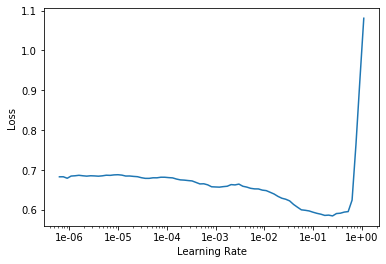

In [9]:
learn.lr_find()
learn.recorder.plot()

In [10]:
learn.fit(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.364110,0.411464,0.805000,00:02
1,0.361678,0.387452,0.835000,00:02
2,0.360929,0.375024,0.830000,00:02
3,0.354712,0.369190,0.840000,00:02
4,0.354021,0.363150,0.840000,00:02


## Inference

In [11]:
learn.predict(df_adult.iloc[800])

(Category <50k, tensor(0), tensor([0.9645, 0.0355]))

In [12]:
df_adult.iloc[800]

age                               45
workclass                    Private
fnlwgt                         96975
education               Some-college
education-num                    NaN
marital-status              Divorced
occupation         Handlers-cleaners
relationship               Unmarried
race                           White
sex                           Female
capital-gain                       0
capital-loss                       0
hours-per-week                    40
native-country         United-States
salary                          <50k
Name: 800, dtype: object